In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import *
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.regularizers import l1, l2
from sklearn import metrics

In [2]:
physical_devices = tf.config.list_physical_devices('GPU')
tf.config.experimental.set_memory_growth(physical_devices[0], enable=True)

In [3]:
class StandardScaler:
    def __init__(self, data):
        self.mean = np.mean(data)
        self.std = np.std(data)

    def transform(self, data):
        return (data - self.mean) / self.std

    def inverse_transform(self, data):
        return data * self.std + self.mean

In [4]:
def create_matrixs(data, timesteps):
    x, y = [], []
    for i in range(timesteps, data.shape[0]):
        x.append(data[i - timesteps:i])
        y.append(data[i])
    return np.array(x), np.array(y)

In [5]:
def split(x, y, seed=0):
    a = int(0.8 * x.shape[0])
    b = int(0.9 * x.shape[0])
    index = np.arange(a)
    np.random.seed(seed)
    np.random.shuffle(index)
    return x[:a][index], y[:a][index], x[a:b], y[a:b], x[b:], y[b:]

In [6]:
def create_model(shape):
    inputs = Input(shape=(shape[1], shape[2]))
    outputs = Bidirectional(LSTM(128, return_sequences=True))(inputs)
    outputs = Bidirectional(LSTM(128))(outputs)
    outputs = Dense(64, kernel_initializer='he_uniform')(outputs)
    ourputs = BatchNormalization()(outputs)
    outputs = LeakyReLU()(outputs)
    outputs = Dense(1, kernel_regularizer=l2())(outputs)
    return Model(inputs=inputs, outputs=outputs)

In [7]:
timesteps = 90
data = pd.read_csv('bdi.csv', parse_dates=['date'], index_col=['date']).fillna(method='ffill').values
x, y = create_matrixs(data, timesteps)
x_train, y_train, x_val, y_val, x_test, y_test = split(x, y)
scaler = StandardScaler(y_train)
y_train = scaler.transform(y_train)
x_train = scaler.transform(x_train)
y_val = scaler.transform(y_val)
x_val = scaler.transform(x_val)
x_test = scaler.transform(x_test)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 90, 1)]           0         
_________________________________________________________________
bidirectional (Bidirectional (None, 90, 256)           133120    
_________________________________________________________________
bidirectional_1 (Bidirection (None, 256)               394240    
_________________________________________________________________
dense (Dense)                (None, 64)                16448     
_________________________________________________________________
leaky_re_lu (LeakyReLU)      (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 65        
Total params: 543,873
Trainable params: 543,873
Non-trainable params: 0
_______________________________________________________

Epoch 71/150
24/24 [==============================] - 1s 42ms/step - loss: 0.0016 - val_loss: 9.6760e-04
Epoch 72/150
24/24 [==============================] - 1s 42ms/step - loss: 0.0015 - val_loss: 9.5973e-04
Epoch 73/150
24/24 [==============================] - 1s 41ms/step - loss: 0.0015 - val_loss: 9.4232e-04
Epoch 74/150
24/24 [==============================] - 1s 42ms/step - loss: 0.0015 - val_loss: 9.0120e-04
Epoch 75/150
24/24 [==============================] - 1s 40ms/step - loss: 0.0016 - val_loss: 0.0012
Epoch 76/150
24/24 [==============================] - 1s 40ms/step - loss: 0.0016 - val_loss: 9.0299e-04
Epoch 77/150
24/24 [==============================] - 1s 39ms/step - loss: 0.0015 - val_loss: 0.0010
Epoch 78/150
24/24 [==============================] - 1s 41ms/step - loss: 0.0015 - val_loss: 8.6823e-04
Epoch 79/150
24/24 [==============================] - 1s 40ms/step - loss: 0.0015 - val_loss: 9.0175e-04
Epoch 80/150
24/24 [==============================] - 1s 40ms/s

Epoch 148/150
24/24 [==============================] - 1s 39ms/step - loss: 7.7568e-04 - val_loss: 4.5446e-04
Epoch 149/150
24/24 [==============================] - 1s 39ms/step - loss: 8.0145e-04 - val_loss: 4.7394e-04
Epoch 150/150
24/24 [==============================] - 1s 39ms/step - loss: 0.0013 - val_loss: 7.4815e-04
Epoch 1/100
24/24 [==============================] - 2s 74ms/step - loss: 7.3952e-04 - val_loss: 4.5160e-04
Epoch 2/100
24/24 [==============================] - 1s 42ms/step - loss: 7.1520e-04 - val_loss: 4.4720e-04
Epoch 3/100
24/24 [==============================] - 1s 40ms/step - loss: 7.0432e-04 - val_loss: 4.5233e-04
Epoch 4/100
24/24 [==============================] - 1s 40ms/step - loss: 7.0013e-04 - val_loss: 4.5445e-04
Epoch 5/100
24/24 [==============================] - 1s 40ms/step - loss: 6.9656e-04 - val_loss: 4.4721e-04
Epoch 6/100
24/24 [==============================] - 1s 40ms/step - loss: 6.9498e-04 - val_loss: 4.4850e-04
Epoch 7/100
24/24 [=======

24/24 [==============================] - 1s 39ms/step - loss: 6.8067e-04 - val_loss: 4.4270e-04
Epoch 74/100
24/24 [==============================] - 1s 39ms/step - loss: 6.7939e-04 - val_loss: 4.4379e-04
Epoch 75/100
24/24 [==============================] - 1s 39ms/step - loss: 6.8218e-04 - val_loss: 4.4467e-04
Epoch 76/100
24/24 [==============================] - 1s 39ms/step - loss: 6.8153e-04 - val_loss: 4.4606e-04
Epoch 77/100
24/24 [==============================] - 1s 41ms/step - loss: 6.8116e-04 - val_loss: 4.4205e-04
Epoch 78/100
24/24 [==============================] - 1s 39ms/step - loss: 6.8376e-04 - val_loss: 4.4338e-04
Epoch 79/100
24/24 [==============================] - 1s 40ms/step - loss: 6.7735e-04 - val_loss: 4.4295e-04
Epoch 80/100
24/24 [==============================] - 1s 40ms/step - loss: 6.7655e-04 - val_loss: 4.4258e-04
Epoch 81/100
24/24 [==============================] - 1s 39ms/step - loss: 6.7686e-04 - val_loss: 4.4265e-04
Epoch 82/100
24/24 [============

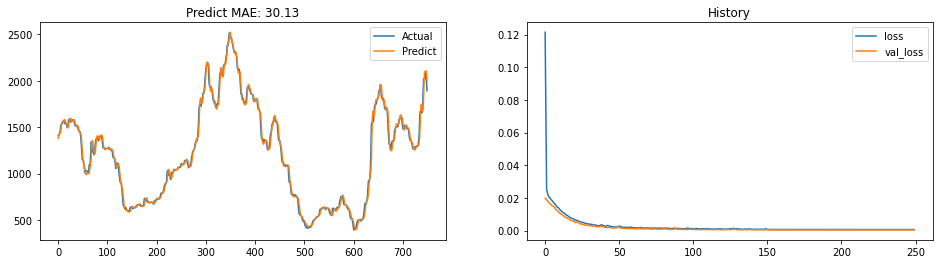

In [8]:
model = create_model(x_train.shape)
model.compile(loss='mean_squared_error', optimizer='adam')
model.summary()
filepath = 'checkpoint.h5'
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_loss', save_best_only=True)
history0 = model.fit(x_train,
                     y_train,
                     batch_size=256,
                     epochs=150,
                     validation_data=(x_val, y_val),
                     callbacks=[checkpoint],
                     shuffle=True)
model = load_model(filepath)
model.compile(loss='mean_squared_error', optimizer=SGD(learning_rate=0.001, momentum=0.9))
history1 = model.fit(x_train, y_train, validation_data=(x_val, y_val), 
                     batch_size=256, epochs=100, callbacks=[checkpoint], shuffle=True)
model = load_model(filepath)
predict = scaler.inverse_transform(model.predict(x_test))
plt.figure(figsize=(16, 4))
plt.subplot(1, 2, 1)
plt.plot(y_test, label='Actual')
plt.plot(predict, label='Predict')
plt.title(f'Predict MAE: {metrics.mean_absolute_error(y_test, predict):.2f}')
plt.legend()
plt.subplot(1, 2, 2)
plt.plot(history0.history['loss'] + history1.history['loss'], label='loss')
plt.plot(history0.history['val_loss'] + history1.history['val_loss'], label='val_loss')
plt.title(f'History')
plt.legend()
plt.show()

In [9]:
def Forecast(data, model):
    a = data.shape[0]
    b = []
    for _ in range(length):
        predict = list(model.predict(data[-a:, 0].reshape(1, -1, 1)).reshape(-1))
        b.append(predict)
        data = np.array(list(data.reshape(-1)) + predict).reshape(-1, 1)
    return np.array(b)

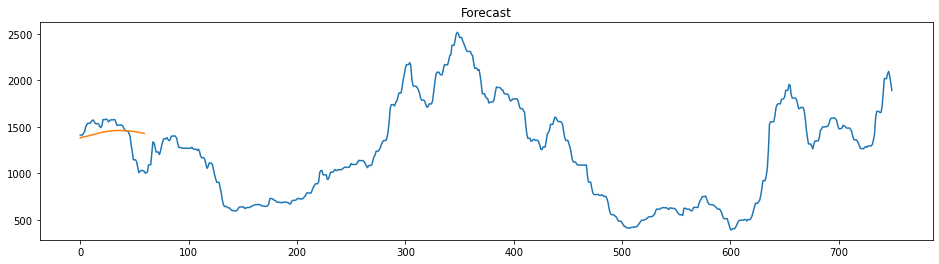

In [10]:
start = 0
length = 60
forecast = scaler.inverse_transform(Forecast(x_test[0], model))
plt.figure(figsize=(16, 4))
plt.plot(y_test)
plt.plot(range(start, start+length),forecast)
plt.title('Forecast')
plt.show()